# Split dataset into different `PROPERTY_TYPE`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from helpers import constants as C

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
main_df = pd.read_csv("data/processed/mumbai.csv").sort_values("PRICE", ignore_index=True)
print(main_df.shape)
main_df.head()

(7759, 33)


,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LONGITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRANSPORATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,FEATURES_SCORE
0,70430058,s70430058,mumbai beyond thane,4500.0,7.0,630.0,50.0,1 bhk flat in shirgaon,explore this amicable chs ltd. of shirgaon in ...,residential apartment,Unfurnished,North-East,5-10 Year Old Property,mid rise,1.0,chs ltd.,0.0,low rise,19.154574,73.230865,1.0,shirgaon,chs ltd.,chs ltd.,001,0.0,3.0,0.0,1.0,24.0,7.0,63,21
1,70338292,x70338292,navi mumbai,4801.0,17.0,400.0,30.0,1 bhk flat in taloja panchanand,cidco mass housing scheme taloja is one of nav...,residential apartment,Semifurnished,North-West,1-5 Year Old Property,high rise,1.0,cidco mass housing scheme taloja,0.0,high rise,19.068930,73.086120,1.0,taloja panchanand,cidco mass housing scheme taloja,cidco mass housing scheme taloja,1102,0.0,1.0,0.0,0.0,14.0,2.0,55,15
2,70781100,m70781100,navi mumbai,4950.0,12.0,390.0,30.0,1 bhk flat in taloja panchanand,this lovely 1 bhk apartment for rent in taloja...,residential apartment,Semifurnished,North-East,1-5 Year Old Property,high rise,1.0,cidco mass housing scheme taloja,0.0,mid rise,19.068930,73.086120,1.0,taloja panchanand,cidco mass housing scheme taloja,cidco mass housing scheme taloja,803,0.0,1.0,0.0,0.0,14.0,2.0,48,15
3,69933534,q69933534,mumbai beyond thane,5000.0,11.0,417.0,21.0,1 bhk flat in dombivli east,find this 1 bhk apartment for rent in dombivli...,residential apartment,Unfurnished,North-East,1-5 Year Old Property,high rise,1.0,lodha palava crown,0.0,mid rise,19.187294,73.075150,1.0,dombivli east,lodha palava crown,lodha palava crown,1111,0.0,0.0,0.0,0.0,8.0,6.0,97,47
4,69702228,j69702228,mumbai beyond thane,5000.0,11.0,450.0,49.0,1 bhk flat in diva east,"1 bedroom, 1 hall, kitchen, toilet n bathroom,...",residential apartment,Unfurnished,East,5-10 Year Old Property,mid rise,1.0,"govind dham, ganesh nagar",0.0,low rise,19.175110,72.995490,1.0,diva east,"govind dham, ganesh nagar","govind dham, ganesh nagar",NaN,3.0,2.0,0.0,0.0,19.0,5.0,6,0


In [5]:
main_df["PROP_ID"].duplicated().sum()

np.int64(0)

In [6]:
main_df.columns

Index(['SPID', 'PROP_ID', 'CITY', 'PRICE', 'PRICE_SQFT', 'AREA',
       'TOTAL_LANDMARK_COUNT', 'PROP_HEADING', 'DESCRIPTION', 'PROPERTY_TYPE',
       'FURNISH', 'FACING', 'AGE', 'TOTAL_FLOOR', 'BEDROOM_NUM', 'PROP_NAME',
       'BALCONY_NUM', 'FLOOR_NUM', 'LATITUDE', 'LONGITUDE', 'BHK_BED',
       'LOCALITY_NAME', 'BUILDING_NAME', 'SOCIETY_NAME', 'ADDRESS',
       'TRANSPORATION', 'ACCOMODATION', 'LEISURE', 'EDUCATION', 'HEALTH',
       'OTHER', 'AMENITIES_SCORE', 'FEATURES_SCORE'],
      dtype='object')

In [7]:
main_df["PROPERTY_TYPE"].value_counts()

PROPERTY_TYPE
residential apartment        7642
residential land               59
independent house/villa        44
independent/builder floor       9
farm house                      4
serviced apartments             1
Name: count, dtype: int64

### Important functions

In [8]:
def boxplot(df: pd.DataFrame) -> None:
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    sns.boxplot(x=df["PRICE"], ax=ax1, color=C.LIGHT_GREEN)
    sns.boxplot(x=df["AREA"], ax=ax2, color=C.SKY_BLUE)

    plt.tight_layout()
    plt.show()

In [9]:
# Copy main_df into df to work upon
df = main_df.copy(True)

## General Step - Start

In [10]:
drop_cols = [
    "SPID",
    "TOTAL_LANDMARK_COUNT",
    "LATITUDE",
    "LONGITUDE",
    "FACING",
    "AGE",
    "BHK_BED",
    "FLOOR_NUM",
    "TOTAL_FLOOR",
    "BALCONY_NUM",
    "FURNISH",
    "LOCALITY_NAME",
    "BUILDING_NAME",
    "SOCIETY_NAME",
    "ADDRESS",
    "TRANSPORATION",
    "ACCOMODATION",
    "LEISURE",
    "EDUCATION",
    "HEALTH",
    "OTHER",
    "AMENITIES_SCORE",
    "FEATURES_SCORE",
]
drop_index = df.query("PROPERTY_TYPE==['farm house', 'serviced apartments']").index
df = df.drop(columns=drop_cols, index=drop_index, errors="ignore").reset_index(drop=True)

print(df.shape)
df.head()

(7754, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,s70430058,mumbai beyond thane,4500.0,7.0,630.0,1 bhk flat in shirgaon,explore this amicable chs ltd. of shirgaon in ...,residential apartment,1.0,chs ltd.
1,x70338292,navi mumbai,4801.0,17.0,400.0,1 bhk flat in taloja panchanand,cidco mass housing scheme taloja is one of nav...,residential apartment,1.0,cidco mass housing scheme taloja
2,m70781100,navi mumbai,4950.0,12.0,390.0,1 bhk flat in taloja panchanand,this lovely 1 bhk apartment for rent in taloja...,residential apartment,1.0,cidco mass housing scheme taloja
3,q69933534,mumbai beyond thane,5000.0,11.0,417.0,1 bhk flat in dombivli east,find this 1 bhk apartment for rent in dombivli...,residential apartment,1.0,lodha palava crown
4,j69702228,mumbai beyond thane,5000.0,11.0,450.0,1 bhk flat in diva east,"1 bedroom, 1 hall, kitchen, toilet n bathroom,...",residential apartment,1.0,"govind dham, ganesh nagar"


### Data Preprocessing

In [11]:
imp_cols = ["PRICE", "AREA", "PRICE_SQFT"]

In [12]:
df["PRICE"] = df["PRICE"].div(C.LAKH)
df["PROP_ID"] = "https://99acres.com/" + df["PROP_ID"].str.upper()

#### Capping in dataset

- I am doing capping on the dataset to remove the extreme outlier data points.
- I perform it on `PRICE` and `AREA` columns.

In [13]:
df["PROPERTY_TYPE"].value_counts()

PROPERTY_TYPE
residential apartment        7642
residential land               59
independent house/villa        44
independent/builder floor       9
Name: count, dtype: int64

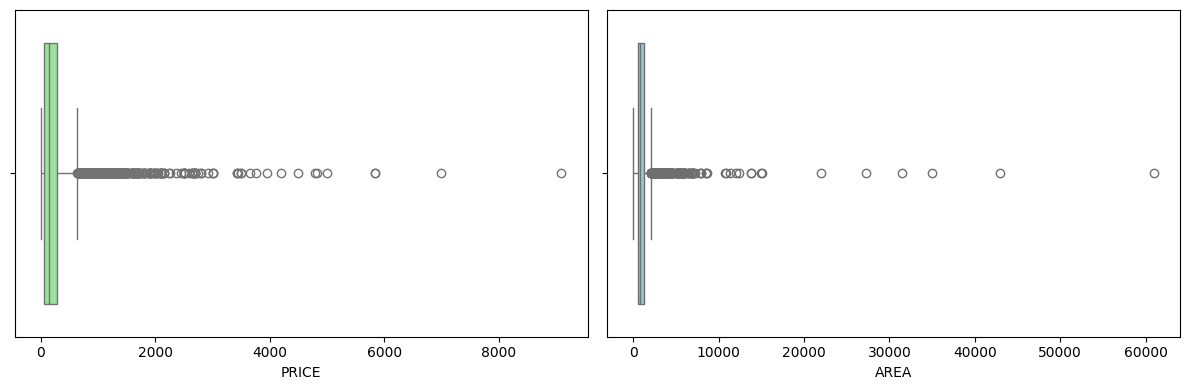

In [14]:
boxplot(df)

I can simply remove the properties whose `PRICE>50 Cr` and `AREA>1L sq.ft.`.

In [17]:
print(f"Before Shape: {df.shape}")
df = df.query("PRICE<3500 and AREA<10000")
print(f"After Shape:  {df.shape}")

Before Shape: (7740, 10)
After Shape:  (7725, 10)


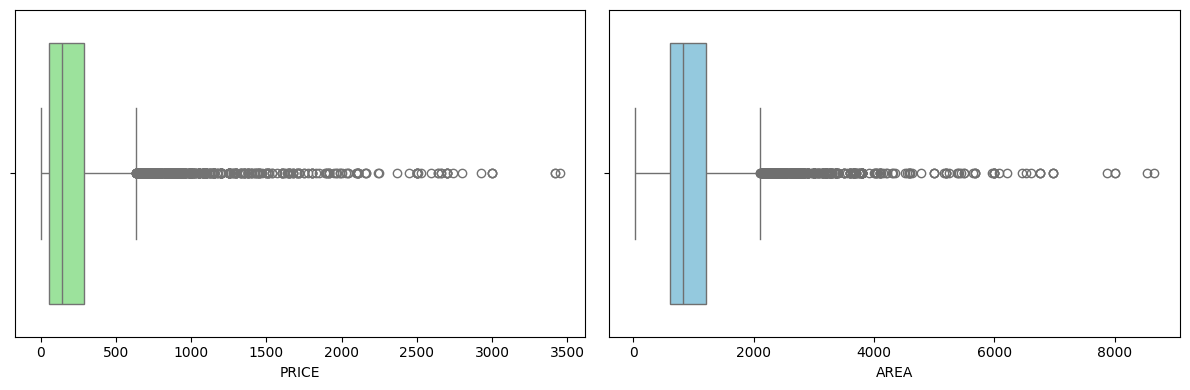

In [18]:
boxplot(df)

In [20]:
df.query("PRICE>2250")["PROPERTY_TYPE"].value_counts()

PROPERTY_TYPE
residential apartment      26
residential land            1
independent house/villa     1
Name: count, dtype: int64

In [21]:
df.query("AREA>6000")["PROPERTY_TYPE"].value_counts()

PROPERTY_TYPE
residential apartment      11
independent house/villa     3
residential land            2
Name: count, dtype: int64

In [22]:
df.query("PRICE>2250 and AREA>6000")["PROPERTY_TYPE"].value_counts()

PROPERTY_TYPE
residential apartment      1
residential land           1
independent house/villa    1
Name: count, dtype: int64

## Rental properties in whole dataset

In [23]:
rent_temp = pd.concat(
    [df[df["DESCRIPTION"].str.contains(" rent ") & (df["PRICE"] < 20)], df.query("PRICE<5")],
    ignore_index=True,
)
print(rent_temp.shape)
rent_temp.head()

(2148, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/S70430058,mumbai beyond thane,0.04500,7.0,630.0,1 bhk flat in shirgaon,explore this amicable chs ltd. of shirgaon in ...,residential apartment,1.0,chs ltd.
1,https://99acres.com/X70338292,navi mumbai,0.04801,17.0,400.0,1 bhk flat in taloja panchanand,cidco mass housing scheme taloja is one of nav...,residential apartment,1.0,cidco mass housing scheme taloja
2,https://99acres.com/M70781100,navi mumbai,0.04950,12.0,390.0,1 bhk flat in taloja panchanand,this lovely 1 bhk apartment for rent in taloja...,residential apartment,1.0,cidco mass housing scheme taloja
3,https://99acres.com/Q69933534,mumbai beyond thane,0.05000,11.0,417.0,1 bhk flat in dombivli east,find this 1 bhk apartment for rent in dombivli...,residential apartment,1.0,lodha palava crown
4,https://99acres.com/B70338208,navi mumbai,0.05200,11.0,450.0,1 bhk flat in taloja panchanand,cidco mass housing scheme taloja is the most p...,residential apartment,1.0,cidco mass housing scheme taloja


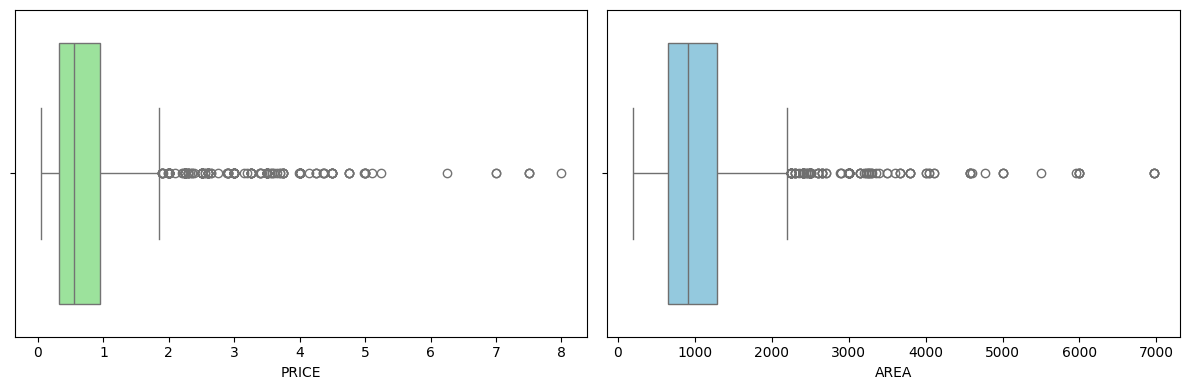

In [24]:
boxplot(rent_temp)

In [25]:
rent_temp.query("PRICE>6 or AREA>4500")

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
237,https://99acres.com/L70236376,mumbai andheri-dahisar,0.32,75.0,4574.0,1 bhk flat in oshiwara,this lovely 1 bhk apartment for rent in oshiwa...,residential apartment,1.0,lotus residency
777,https://99acres.com/P69997114,central mumbai suburbs,1.15,16.0,6968.0,2 bhk flat in hiranandani gardens powai,situated in hiranandani gardens powai central ...,residential apartment,2.0,hiranandani castle rock
798,https://99acres.com/F69996946,central mumbai suburbs,1.20,17.0,6968.0,2 bhk flat in hiranandani gardens powai,central mumbai suburbs's most popular society ...,residential apartment,2.0,hiranandani castle rock
910,https://99acres.com/Y70316624,central mumbai suburbs,4.36,95.0,4575.0,5 bhk flat in panchkutir ganesh nagar,central mumbai suburbs's most popular society ...,residential apartment,5.0,hiranandani evita
911,https://99acres.com/W67280324,central mumbai suburbs,4.37,87.0,5000.0,5 bhk flat in hiranandani gardens powai,a 5 bhk flat for rent in hiranandani gardens p...,residential apartment,5.0,hiranandani gardens richmond tower
920,https://99acres.com/S67523716,south mumbai,6.25,189.0,3300.0,4 bhk flat in cuffe parade,art deco 4 bhk on rent in cuffe parade super s...,residential apartment,4.0,pallonji mansion
921,https://99acres.com/Z70126920,mumbai south west,7.00,127.0,5500.0,4 bhk flat in bandra kurla complex,sunteck signia pearl is on rent now near ( am...,residential apartment,4.0,sunteck signia pearl
922,https://99acres.com/Q70126674,mumbai south west,7.00,140.0,5000.0,4 bhk flat in bandra kurla complex,sunteck signia isles is on rent now locality i...,residential apartment,4.0,sunteck signia isles
923,https://99acres.com/K70128728,mumbai south west,7.50,214.0,6000.0,5 bhk flat in bandra kurla complex,sunteck insignia pearl flat is now on rent lo...,residential apartment,5.0,sunteck signia pearl
924,https://99acres.com/B70126354,mumbai south west,7.50,125.0,6000.0,5 bhk flat in bandra kurla complex,sunteck signia isles is on rent now locality i...,residential apartment,5.0,sunteck signia isles


> Some properties have almost `₹0` of `PRICE_SQFT`.

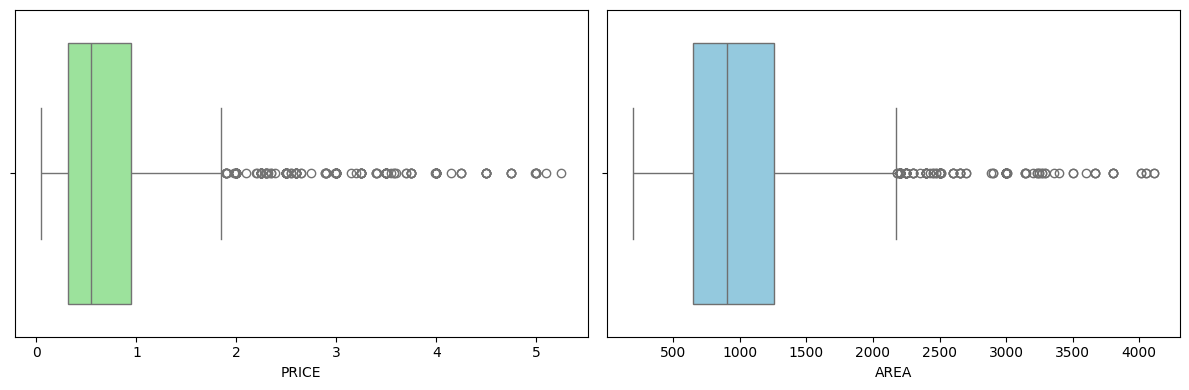

In [26]:
boxplot(rent_temp.query("PRICE<6 and AREA<4500"))

In [27]:
rent_temp.query("PRICE<6 and AREA<4500")["PROPERTY_TYPE"].value_counts()

PROPERTY_TYPE
residential apartment        2097
residential land               23
independent house/villa         7
independent/builder floor       1
Name: count, dtype: int64

## Split dataset on `PROPERTY_TYPE`

In [36]:
df["PROPERTY_TYPE"].value_counts()

PROPERTY_TYPE
residential apartment        7623
residential land               53
independent house/villa        40
independent/builder floor       9
Name: count, dtype: int64

In [37]:
res_apartment = df.query("PROPERTY_TYPE=='residential apartment'").reset_index(drop=True)
ind_floor = df.query("PROPERTY_TYPE=='independent/builder floor'").reset_index(drop=True)
res_land = df.query("PROPERTY_TYPE=='residential land'").reset_index(drop=True)
ind_house = df.query("PROPERTY_TYPE=='independent house/villa'").reset_index(drop=True)

In [38]:
print(f"{res_apartment.shape = }")
print(f"{ind_floor.shape = }")
print(f"{res_land.shape = }")
print(f"{ind_house.shape = }")

res_apartment.shape = (7623, 10)
ind_floor.shape = (9, 10)
res_land.shape = (53, 10)
ind_house.shape = (40, 10)


## Residential Apartments

In [39]:
print(res_apartment.shape)
res_apartment.head()

(7623, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/S70430058,mumbai beyond thane,0.04500,7.0,630.0,1 bhk flat in shirgaon,explore this amicable chs ltd. of shirgaon in ...,residential apartment,1.0,chs ltd.
1,https://99acres.com/X70338292,navi mumbai,0.04801,17.0,400.0,1 bhk flat in taloja panchanand,cidco mass housing scheme taloja is one of nav...,residential apartment,1.0,cidco mass housing scheme taloja
2,https://99acres.com/M70781100,navi mumbai,0.04950,12.0,390.0,1 bhk flat in taloja panchanand,this lovely 1 bhk apartment for rent in taloja...,residential apartment,1.0,cidco mass housing scheme taloja
3,https://99acres.com/Q69933534,mumbai beyond thane,0.05000,11.0,417.0,1 bhk flat in dombivli east,find this 1 bhk apartment for rent in dombivli...,residential apartment,1.0,lodha palava crown
4,https://99acres.com/J69702228,mumbai beyond thane,0.05000,11.0,450.0,1 bhk flat in diva east,"1 bedroom, 1 hall, kitchen, toilet n bathroom,...",residential apartment,1.0,"govind dham, ganesh nagar"


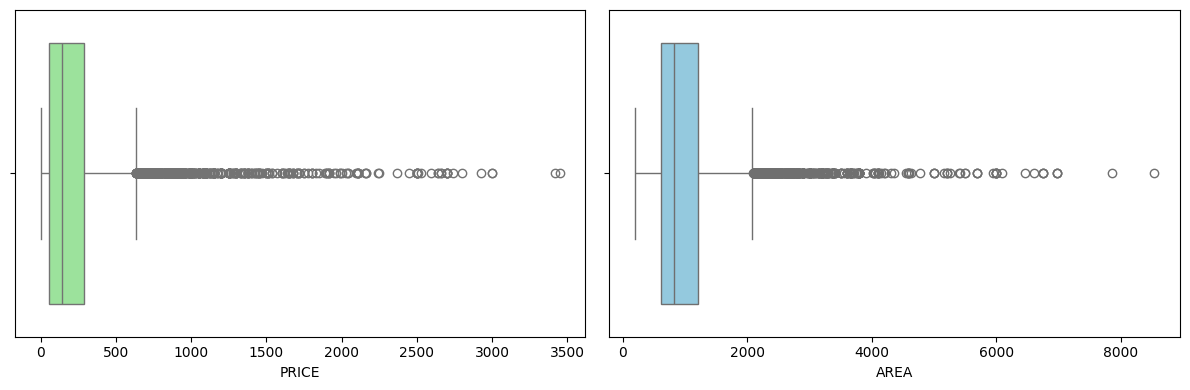

In [40]:
boxplot(res_apartment)

### **Rental** Resdential Apartment

In [43]:
rent_res_apartment = pd.concat(
    [
        res_apartment[
            res_apartment["DESCRIPTION"].str.contains(" rent ") & (res_apartment["PRICE"] < 20)
        ],
        res_apartment.query("PRICE<10"),
    ]
).drop_duplicates(ignore_index=True)

print(rent_res_apartment.shape)
rent_res_apartment.head()

(1210, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/S70430058,mumbai beyond thane,0.04500,7.0,630.0,1 bhk flat in shirgaon,explore this amicable chs ltd. of shirgaon in ...,residential apartment,1.0,chs ltd.
1,https://99acres.com/X70338292,navi mumbai,0.04801,17.0,400.0,1 bhk flat in taloja panchanand,cidco mass housing scheme taloja is one of nav...,residential apartment,1.0,cidco mass housing scheme taloja
2,https://99acres.com/M70781100,navi mumbai,0.04950,12.0,390.0,1 bhk flat in taloja panchanand,this lovely 1 bhk apartment for rent in taloja...,residential apartment,1.0,cidco mass housing scheme taloja
3,https://99acres.com/Q69933534,mumbai beyond thane,0.05000,11.0,417.0,1 bhk flat in dombivli east,find this 1 bhk apartment for rent in dombivli...,residential apartment,1.0,lodha palava crown
4,https://99acres.com/B70338208,navi mumbai,0.05200,11.0,450.0,1 bhk flat in taloja panchanand,cidco mass housing scheme taloja is the most p...,residential apartment,1.0,cidco mass housing scheme taloja


In [44]:
rent_res_apartment.tail()

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
1205,https://99acres.com/O70488058,mumbai south west,5.00,250.0,2000.0,4 bhk flat in juhu,dear sir / madam we are pleased to offer you a...,residential apartment,4.0,disha tulip
1206,https://99acres.com/B68323230,south mumbai,6.50,196.0,3300.0,4 bhk flat in cuffe parade,having old world charm with 4 br with attached...,residential apartment,4.0,pallonji mansion
1207,https://99acres.com/D65937328,mumbai south west,8.00,199.0,4019.0,5 bhk flat in bandra kurla complex,brilliant location and layouts. connect for th...,residential apartment,5.0,sunteck signature island
1208,https://99acres.com/A65932400,mumbai south west,8.00,236.0,3386.0,4 bhk flat in bandra kurla complex,brilliant and unparalleled location and in a w...,residential apartment,4.0,sunteck signature island
1209,https://99acres.com/I69125378,mumbai south west,8.95,279.0,3200.0,5 bhk flat in 11 road khar west,this 5 bhk flat in 11 road khar west is availa...,residential apartment,5.0,trinity


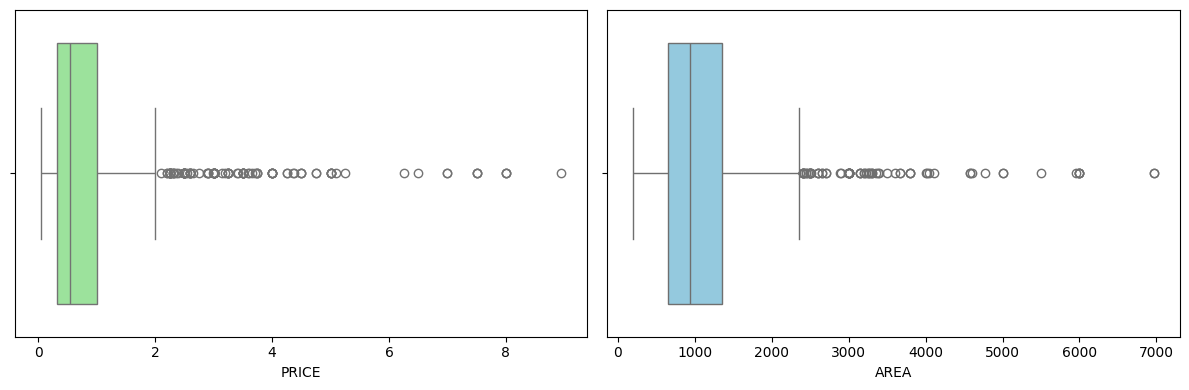

In [45]:
boxplot(rent_res_apartment)

In [46]:
rent_res_apartment.query("AREA>4500")

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
236,https://99acres.com/L70236376,mumbai andheri-dahisar,0.32,75.0,4574.0,1 bhk flat in oshiwara,this lovely 1 bhk apartment for rent in oshiwa...,residential apartment,1.0,lotus residency
775,https://99acres.com/P69997114,central mumbai suburbs,1.15,16.0,6968.0,2 bhk flat in hiranandani gardens powai,situated in hiranandani gardens powai central ...,residential apartment,2.0,hiranandani castle rock
796,https://99acres.com/F69996946,central mumbai suburbs,1.20,17.0,6968.0,2 bhk flat in hiranandani gardens powai,central mumbai suburbs's most popular society ...,residential apartment,2.0,hiranandani castle rock
908,https://99acres.com/Y70316624,central mumbai suburbs,4.36,95.0,4575.0,5 bhk flat in panchkutir ganesh nagar,central mumbai suburbs's most popular society ...,residential apartment,5.0,hiranandani evita
909,https://99acres.com/W67280324,central mumbai suburbs,4.37,87.0,5000.0,5 bhk flat in hiranandani gardens powai,a 5 bhk flat for rent in hiranandani gardens p...,residential apartment,5.0,hiranandani gardens richmond tower
919,https://99acres.com/Z70126920,mumbai south west,7.00,127.0,5500.0,4 bhk flat in bandra kurla complex,sunteck signia pearl is on rent now near ( am...,residential apartment,4.0,sunteck signia pearl
920,https://99acres.com/Q70126674,mumbai south west,7.00,140.0,5000.0,4 bhk flat in bandra kurla complex,sunteck signia isles is on rent now locality i...,residential apartment,4.0,sunteck signia isles
921,https://99acres.com/K70128728,mumbai south west,7.50,214.0,6000.0,5 bhk flat in bandra kurla complex,sunteck insignia pearl flat is now on rent lo...,residential apartment,5.0,sunteck signia pearl
922,https://99acres.com/B70126354,mumbai south west,7.50,125.0,6000.0,5 bhk flat in bandra kurla complex,sunteck signia isles is on rent now locality i...,residential apartment,5.0,sunteck signia isles
923,https://99acres.com/I70126438,mumbai south west,7.50,125.0,6000.0,5 bhk flat in bandra kurla complex,sunteck signia isles is on rent now locality i...,residential apartment,5.0,sunteck signia isles


(1196, 10)


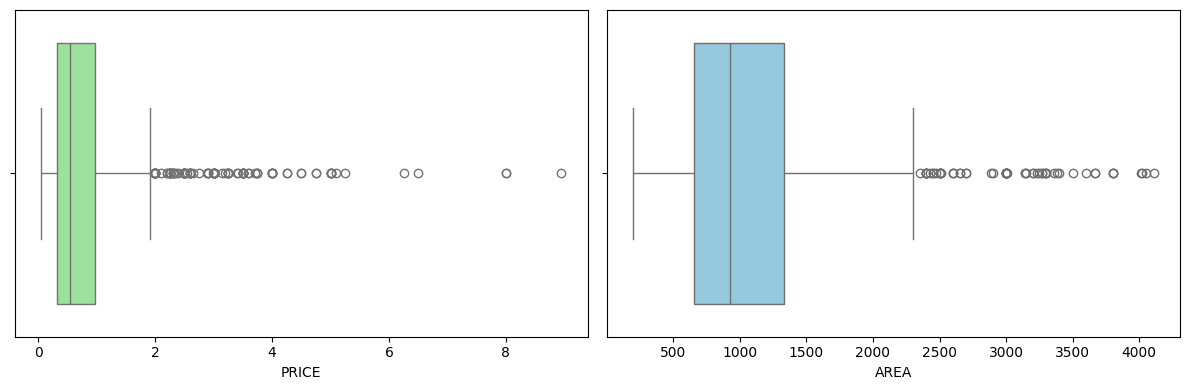

In [47]:
rent_res_apartment = rent_res_apartment.query("AREA<4500")
print(rent_res_apartment.shape)
boxplot(rent_res_apartment)

In [48]:
rent_res_apartment[imp_cols].describe()

,PRICE,AREA,PRICE_SQFT
count,1196.000000,1196.000000,1196.000000
mean,0.839720,1092.479097,75.175585
std,0.935466,634.354601,69.986413
min,0.045000,200.000000,7.000000
25%,0.320000,653.250000,41.000000
50%,0.550000,922.500000,65.000000
75%,0.963350,1330.000000,90.250000
max,8.950000,4111.000000,1303.000000


### **Summary** - _Rental_ Residential Apartment

- Data Length: **1.9k**
- PRICE range: **5500 to 9L**
- AREA range: **256 to 8k sq.ft.**

### **Drop** rental apartments

In [49]:
res_apartment = res_apartment.drop(
    index=res_apartment[res_apartment["PROP_ID"].isin(rent_res_apartment["PROP_ID"])].index,
).reset_index(drop=True)

In [50]:
# As I removed some outliers in rental apartments
# Those data comes into residential apartments
# So  need to remove them
res_apartment = res_apartment.query("PRICE>10")

print(res_apartment.shape)
res_apartment.head()

(6412, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
15,https://99acres.com/E70972864,south mumbai,11.0,379.0,2900.0,5 bhk flat in prabhadevi,it's an exclusive apartment available on lease...,residential apartment,5.0,25 south
16,https://99acres.com/B70629324,mumbai south west,13.0,393.0,3300.0,3 bhk flat in juhu,a very beautiful sea facing aartmen in juhu th...,residential apartment,3.0,on request
17,https://99acres.com/S69543012,mumbai beyond thane,14.0,4000.0,350.0,1 bhk flat in bhivpuri,check out this 1 bhk apartment for sale in sah...,residential apartment,1.0,sahbhagi riva rythm
18,https://99acres.com/P69742642,navi mumbai,15.0,4166.0,360.0,1 bhk flat in navi mumbai nerul east,"situated in navi mumbai nerul east , kuldevta ...",residential apartment,1.0,kuldevta nivas nerul navi mumbai
19,https://99acres.com/B69719832,mumbai beyond thane,17.0,3400.0,500.0,1 bhk flat in dombivli west,"pagdi basis flat - 1bhk for sale, 202, tulsi v...",residential apartment,1.0,tulsi vihar chs


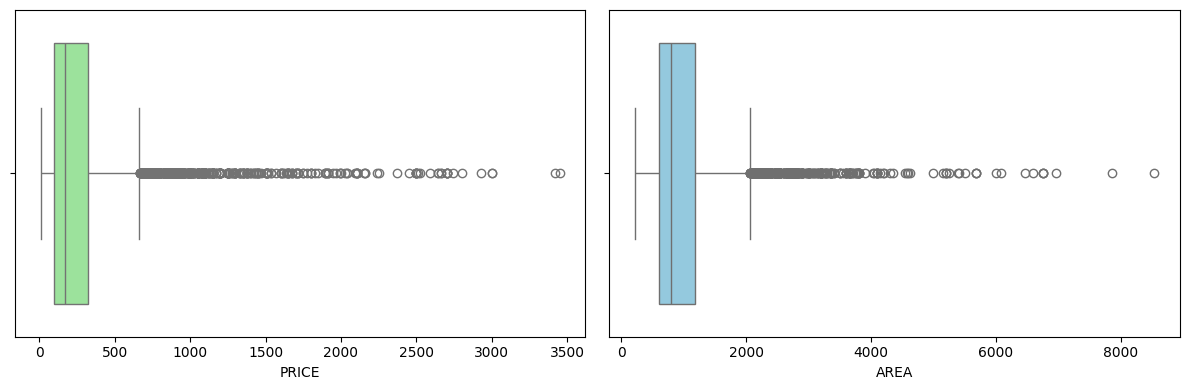

In [51]:
boxplot(res_apartment)

In [62]:
res_apartment.query("PRICE<20")

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
15,https://99acres.com/E70972864,south mumbai,11.00,379.0,2900.0,5 bhk flat in prabhadevi,it's an exclusive apartment available on lease...,residential apartment,5.0,25 south
16,https://99acres.com/B70629324,mumbai south west,13.00,393.0,3300.0,3 bhk flat in juhu,a very beautiful sea facing aartmen in juhu th...,residential apartment,3.0,on request
17,https://99acres.com/S69543012,mumbai beyond thane,14.00,4000.0,350.0,1 bhk flat in bhivpuri,check out this 1 bhk apartment for sale in sah...,residential apartment,1.0,sahbhagi riva rythm
18,https://99acres.com/P69742642,navi mumbai,15.00,4166.0,360.0,1 bhk flat in navi mumbai nerul east,"situated in navi mumbai nerul east , kuldevta ...",residential apartment,1.0,kuldevta nivas nerul navi mumbai
19,https://99acres.com/B69719832,mumbai beyond thane,17.00,3400.0,500.0,1 bhk flat in dombivli west,"pagdi basis flat - 1bhk for sale, 202, tulsi v...",residential apartment,1.0,tulsi vihar chs
20,https://99acres.com/V69543360,mumbai beyond thane,17.30,4103.0,421.5,1 bhk flat in neral,nandadeep residency is a ready to move project...,residential apartment,1.0,nandadeep residency
21,https://99acres.com/N68562592,mira road and beyond,17.98,3995.0,450.0,1 bhk flat in nalasopara west,very nice location appartment with atteched ma...,residential apartment,1.0,mandar shivam sankul
22,https://99acres.com/X69427574,mumbai beyond thane,18.30,5630.0,325.0,1 bhk flat in neral,live in a world of comfort and style at vn amb...,residential apartment,1.0,vn amber heritage
23,https://99acres.com/V70996516,thane,19.00,3558.0,534.0,1 bhk flat in kalher,siddhi apartment is one of the most popular de...,residential apartment,1.0,siddhi apartment
24,https://99acres.com/R65368078,mumbai beyond thane,19.00,5692.0,333.0,1 bhk flat in karjat,"there is a 1 bhk apartment in karjat, mumbai b...",residential apartment,1.0,unimont aurum


In [65]:
res_apartment.drop(res_apartment.query("AREA>4500").index, inplace=True)

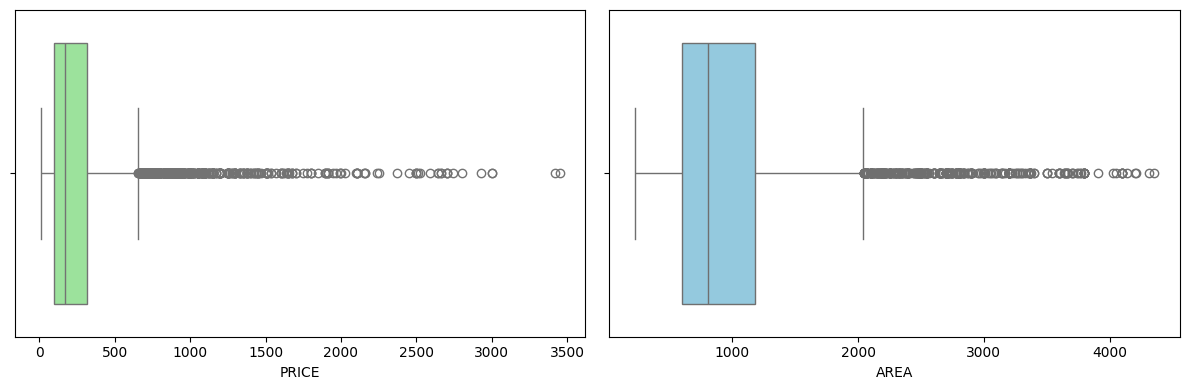

In [66]:
boxplot(res_apartment)

In [67]:
res_apartment[imp_cols].describe()

,PRICE,AREA,PRICE_SQFT
count,6386.000000,6386.000000,6.386000e+03
mean,272.271412,974.949107,2.839376e+04
std,313.988994,585.041170,3.240004e+04
min,11.000000,228.000000,3.790000e+02
25%,96.820000,600.000000,1.492100e+04
50%,172.000000,803.000000,2.359000e+04
75%,320.000000,1176.500000,3.225400e+04
max,3448.000000,4354.000000,1.093824e+06


### **Summary** - Residential Apartment

- Data Length: **4k**
- PRICE range: **11L to 45Cr**
- AREA range: **342 to 16.2k sq.ft.**

## Independent Builer Floors

In [75]:
print(ind_floor.shape)

ind_floor

(9, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/H69945068,central mumbai suburbs,0.06,15.0,400.0,1 bhk independent builder floor in antop hill,best in class property available at antop hill...,independent/builder floor,1.0,NaN
1,https://99acres.com/M69172654,mumbai beyond thane,17.00,2720.0,625.0,1 bhk independent builder floor in vasind,looking for buyer to purchase our builder floo...,independent/builder floor,1.0,shubh vastu sector 5e
2,https://99acres.com/Z67929086,navi mumbai,61.00,10317.0,630.0,1 bhk independent builder floor in sector 20 n...,1bhk multistorey apartment for resale in secto...,independent/builder floor,1.0,"shri ekdant society,nerul"
3,https://99acres.com/Z70273574,navi mumbai,120.00,14201.0,845.0,2 bhk independent builder floor in sector 8a a...,best in class property available at sector 8a ...,independent/builder floor,2.0,NaN
4,https://99acres.com/X69540742,navi mumbai,125.00,14568.0,858.0,3 bhk independent builder floor in sector 16 k...,a 3bhk row house within a society with the wat...,independent/builder floor,3.0,NaN
5,https://99acres.com/A70699788,mumbai south west,180.00,300000.0,540.0,1 bhk independent builder floor in bandra,carefully laid out in the prime location of mu...,independent/builder floor,1.0,"st peters church , chapel road"
6,https://99acres.com/T69896266,mumbai south west,235.00,26111.0,900.0,2 bhk independent builder floor in ram krishna...,fully furnished flat ready to move with all wh...,independent/builder floor,2.0,ajanta apartment
7,https://99acres.com/C69995188,mumbai andheri-dahisar,650.00,12500.0,5200.0,4 bhk independent builder floor in kandivali west,"this is 120 sq mtr property , which has total ...",independent/builder floor,4.0,NaN
8,https://99acres.com/H68368920,south mumbai,1100.00,55000.0,2000.0,2 bhk independent builder floor in churchgate,best in class property available at churchgate...,independent/builder floor,2.0,NaN


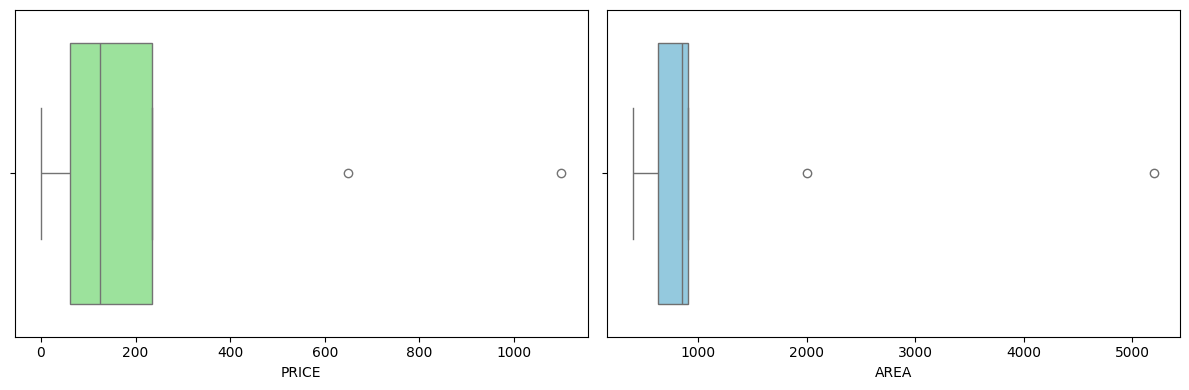

In [76]:
boxplot(ind_floor)

### **Rental** Independent Builder Floors

In [77]:
rent_ind_floor = pd.concat(
    [
        ind_floor[ind_floor["DESCRIPTION"].str.contains(" rent ") & (ind_floor["PRICE"] < 6)],
        ind_floor.query("PRICE<5"),
    ]
).drop_duplicates(ignore_index=True)

print(rent_ind_floor.shape)
rent_ind_floor.head()

(1, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/H69945068,central mumbai suburbs,0.06,15.0,400.0,1 bhk independent builder floor in antop hill,best in class property available at antop hill...,independent/builder floor,1.0,NaN


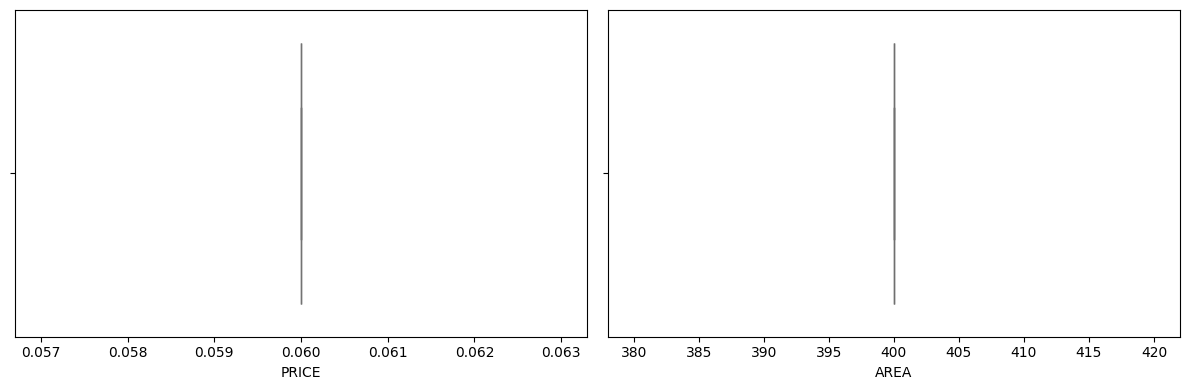

In [78]:
boxplot(rent_ind_floor)

In [79]:
print(rent_ind_floor.query("PRICE>10").shape)
print(rent_ind_floor.query("AREA>4300").shape)
print(rent_ind_floor.query("AREA<700").shape)

(0, 10)
(0, 10)
(1, 10)


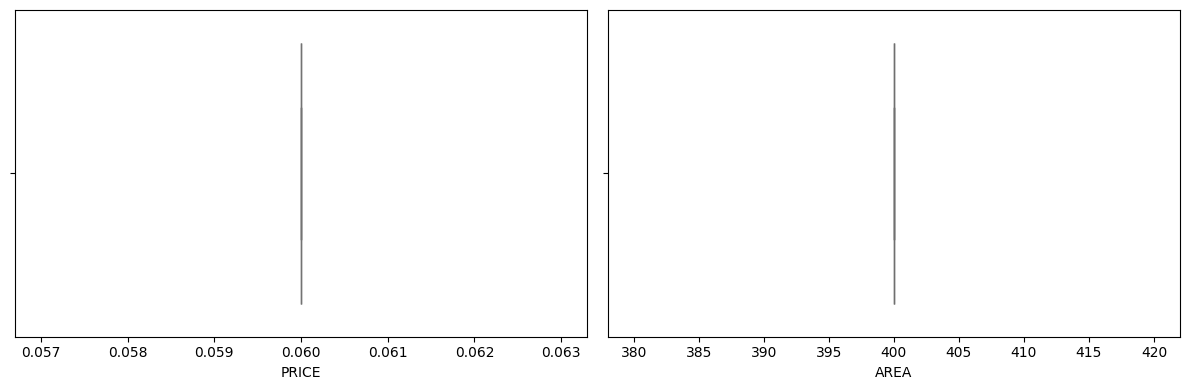

In [80]:
# Remove the extreme value from rental data
rent_ind_floor.drop(index=rent_ind_floor.query("PRICE>10").index, inplace=True)
boxplot(rent_ind_floor)

In [81]:
rent_ind_floor[imp_cols].describe()

,PRICE,AREA,PRICE_SQFT
count,1.00,1.0,1.0
mean,0.06,400.0,15.0
std,NaN,NaN,NaN
min,0.06,400.0,15.0
25%,0.06,400.0,15.0
50%,0.06,400.0,15.0
75%,0.06,400.0,15.0
max,0.06,400.0,15.0


### **Summary** - _Rental_ Independent Builder Floors

- Data Length: **640**
- PRICE range: **12k to 3L**
- AREA range: **160 to 5k sq.ft.**

### **Drop** rental independent floors

(8, 10)


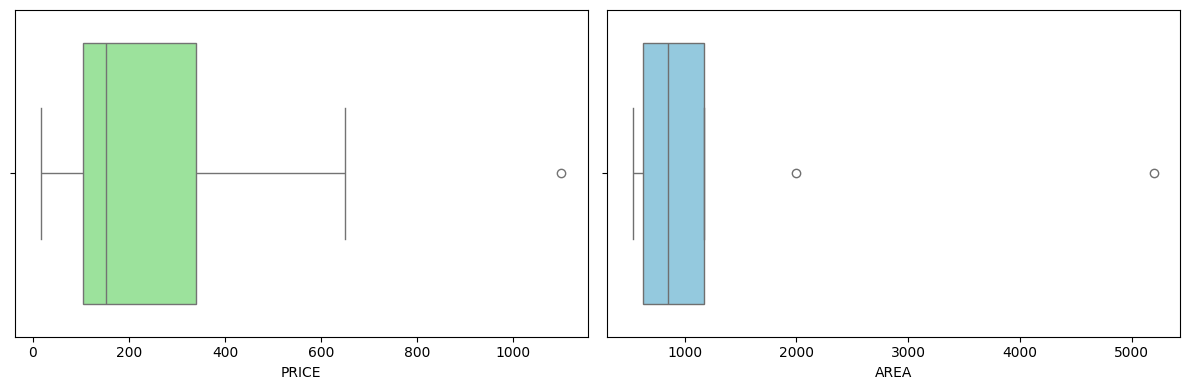

In [82]:
ind_floor = ind_floor.drop(
    index=ind_floor[ind_floor["PROP_ID"].isin(rent_ind_floor["PROP_ID"])].index,
).reset_index(drop=True)

print(ind_floor.shape)
boxplot(ind_floor)

In [83]:
ind_floor.query("PRICE>800 or AREA>1500")

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
6,https://99acres.com/C69995188,mumbai andheri-dahisar,650.0,12500.0,5200.0,4 bhk independent builder floor in kandivali west,"this is 120 sq mtr property , which has total ...",independent/builder floor,4.0,NaN
7,https://99acres.com/H68368920,south mumbai,1100.0,55000.0,2000.0,2 bhk independent builder floor in churchgate,best in class property available at churchgate...,independent/builder floor,2.0,NaN


(6, 10)


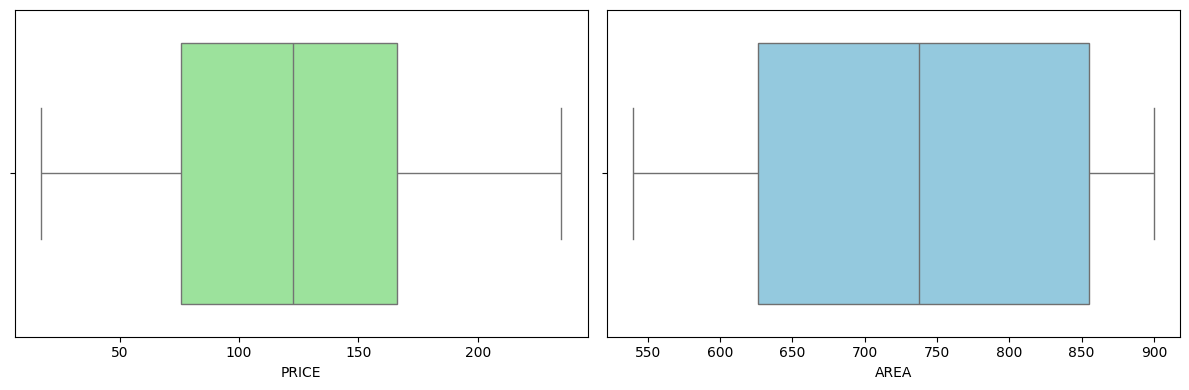

In [85]:
# Remove the outliers from PRICE and AREA column
ind_floor = ind_floor.query("PRICE<800 and AREA<1500")
print(ind_floor.shape)
boxplot(ind_floor)

In [86]:
ind_floor[imp_cols].describe()

,PRICE,AREA,PRICE_SQFT
count,6.000000,6.000000,6.000000
mean,123.000000,733.000000,61319.500000
std,78.595165,152.039469,117174.256348
min,17.000000,540.000000,2720.000000
25%,75.750000,626.250000,11288.000000
50%,122.500000,737.500000,14384.500000
75%,166.250000,854.750000,23225.250000
max,235.000000,900.000000,300000.000000


### **Summary** - Independent Builder Floors

- Data Length: **18k**
- PRICE range: **17 Lac to 18 Cr**
- AREA range: **30 to 91k sq.ft.**

## Residential Lands

In [87]:
print(res_land.shape)
res_land.head()

(53, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/R70115342,navi mumbai,1.99,182.0,1089.0,residential land / plot in pirkon,plot for sale in pirkon is available in navi m...,residential land,NaN,NaN
1,https://99acres.com/H70797670,navi mumbai,2.00,183.0,1089.0,residential land / plot in uran,"rajeshwari nagar, a plot estate situated in gu...",residential land,NaN,future land
2,https://99acres.com/Y66383276,navi mumbai,2.55,234.0,1089.0,residential land / plot in ranjanpada,open plots non agricultural land east side fac...,residential land,NaN,NaN
3,https://99acres.com/A70009900,navi mumbai,3.00,275.0,1089.0,residential land / plot in mothijui,looking for a plot in a prime location of navi...,residential land,NaN,navi mumbai plots vindhane
4,https://99acres.com/Q70929024,navi mumbai,3.40,312.0,1089.0,residential land / plot in uran,na plot available near navi mumbai internation...,residential land,NaN,NaN


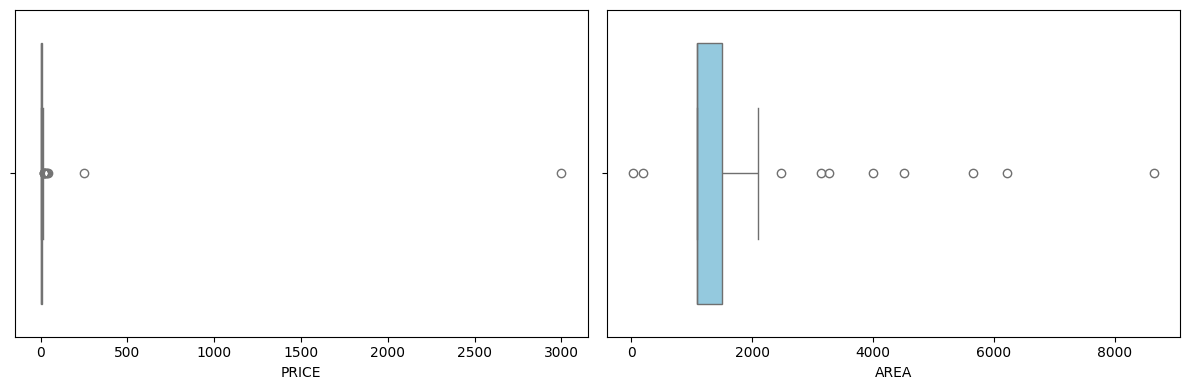

In [88]:
boxplot(res_land)

In [89]:
res_land.query("PRICE>200")

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
51,https://99acres.com/K64611704,mumbai beyond thane,250.0,108695.0,2475.0,residential land / plot in dombivli,"this is a east facing plot, near to dombivali ...",residential land,NaN,NaN
52,https://99acres.com/B70688588,mumbai south west,3000.0,519930.0,6210.0,residential land / plot in santacruz east,residential land/plot for sale in santacruz ea...,residential land,NaN,NaN


In [91]:
res_land.query("AREA>4000")

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
44,https://99acres.com/U69894068,mumbai beyond thane,19.5,431.0,4520.0,residential land / plot in murbad,residential land available for sale in chinar ...,residential land,NaN,chinar classic
49,https://99acres.com/V57043382,mumbai beyond thane,40.0,707.0,5651.0,residential land / plot in borsheti bk,"well protected nearby tourist areas, small riv...",residential land,NaN,rainbow park
50,https://99acres.com/K69638862,mumbai beyond thane,44.0,525.0,8651.0,residential land / plot in murbad,"scenic view of malshej ghat mountains, water a...",residential land,NaN,shantal eden hills
52,https://99acres.com/B70688588,mumbai south west,3000.0,519930.0,6210.0,residential land / plot in santacruz east,residential land/plot for sale in santacruz ea...,residential land,NaN,NaN


In [92]:
np.ceil((res_land.isnull().sum() / res_land.shape[0]) * 100)

PROP_ID            0.0
CITY               0.0
PRICE              0.0
PRICE_SQFT         0.0
AREA               0.0
PROP_HEADING       0.0
DESCRIPTION        0.0
PROPERTY_TYPE      0.0
BEDROOM_NUM      100.0
PROP_NAME         55.0
dtype: float64

In [93]:
res_land[imp_cols].describe()

,PRICE,AREA,PRICE_SQFT
count,53.00000,53.000000,53.000000
mean,69.86000,1700.037736,31636.584906
std,411.66007,1528.297871,153763.279520
min,1.99000,33.000000,182.000000
25%,4.00000,1089.000000,367.000000
50%,5.00000,1089.000000,459.000000
75%,10.00000,1500.000000,650.000000
max,3000.00000,8651.000000,1000000.000000


### **Summary** - Residential Lands

- Data Length: **980**
- PRICE range: **2.3 Lac to 42 Cr**
- AREA range: **60 to 87k sq.ft.**

In [94]:
# I checked
# These properties are true
res_land.query("AREA<150")

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
24,https://99acres.com/C70097576,navi mumbai,5.0,15151.0,33.0,residential land / plot in dronagiri,dronagiri is an ideal location for buying resi...,residential land,NaN,navi mumbai plots vindhane


## Independent Houses

In [95]:
print(ind_house.shape)
ind_house.head()

(40, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/G70691324,mira road and beyond,0.25,13.0,1800.0,2 bedroom house in vasai east,"explore this society, ambavadi bunglow, locate...",independent house/villa,2.0,ambavadi bunglow
1,https://99acres.com/J71024450,mumbai beyond thane,0.28,11.0,2500.0,3 bedroom house in morivali,5 year old independent row house with 3 bed ro...,independent house/villa,3.0,"holland chsl, mhada colony, ambarnath east"
2,https://99acres.com/O70172290,navi mumbai,0.38,633.0,645.0,2 bedroom house in sector 6 vashi,it's individual row house in vashi sector 6 ne...,independent house/villa,2.0,NaN
3,https://99acres.com/D70114182,navi mumbai,0.40,40.0,1000.0,3 bedroom house in nerul,fully furnished 3-bhk flat in a very peaceful ...,independent house/villa,3.0,suyog chs
4,https://99acres.com/T70120756,navi mumbai,0.40,33.0,1180.0,3 bedroom house in belapur,discover your dream of owning an individual ho...,independent house/villa,3.0,sea coast housing society


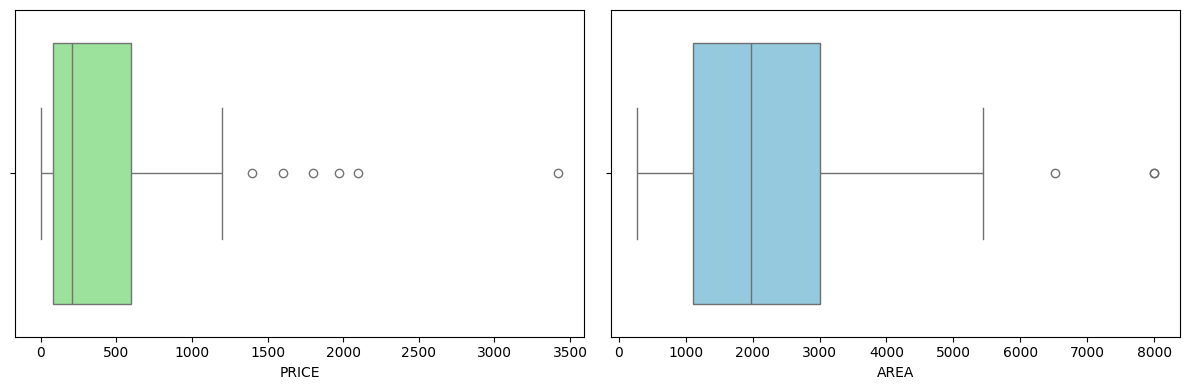

In [96]:
boxplot(ind_house)

### **Rental** Independent House

In [97]:
rent_ind_house = pd.concat(
    [
        ind_house[ind_house["DESCRIPTION"].str.contains(" rent ") & (ind_house["PRICE"] < 20)],
        ind_house.query("PRICE<6"),
    ]
).drop_duplicates(ignore_index=True)

print(rent_ind_house.shape)
rent_ind_house.head()

(5, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/G70691324,mira road and beyond,0.25,13.0,1800.0,2 bedroom house in vasai east,"explore this society, ambavadi bunglow, locate...",independent house/villa,2.0,ambavadi bunglow
1,https://99acres.com/T70120756,navi mumbai,0.40,33.0,1180.0,3 bedroom house in belapur,discover your dream of owning an individual ho...,independent house/villa,3.0,sea coast housing society
2,https://99acres.com/J71024450,mumbai beyond thane,0.28,11.0,2500.0,3 bedroom house in morivali,5 year old independent row house with 3 bed ro...,independent house/villa,3.0,"holland chsl, mhada colony, ambarnath east"
3,https://99acres.com/O70172290,navi mumbai,0.38,633.0,645.0,2 bedroom house in sector 6 vashi,it's individual row house in vashi sector 6 ne...,independent house/villa,2.0,NaN
4,https://99acres.com/D70114182,navi mumbai,0.40,40.0,1000.0,3 bedroom house in nerul,fully furnished 3-bhk flat in a very peaceful ...,independent house/villa,3.0,suyog chs


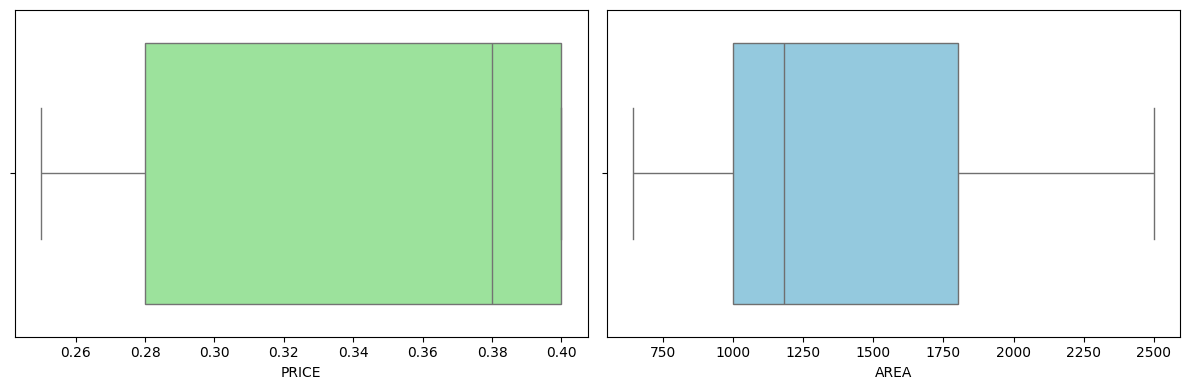

In [98]:
boxplot(rent_ind_house)

In [99]:
print(rent_ind_house.query("PRICE>5").shape)
print(rent_ind_house.query("AREA>@C.TEN_K").shape)

(0, 10)
(0, 10)


In [100]:
# I checked
# These properties are true
rent_ind_house.query("PRICE>5 or AREA>@C.TEN_K")

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME


In [101]:
rent_ind_house = rent_ind_house.query("AREA<15000")
rent_ind_house.shape

(5, 10)

In [102]:
rent_ind_house[imp_cols].describe()

,PRICE,AREA,PRICE_SQFT
count,5.000000,5.000000,5.000000
mean,0.342000,1425.000000,146.000000
std,0.071554,732.342133,272.528898
min,0.250000,645.000000,11.000000
25%,0.280000,1000.000000,13.000000
50%,0.380000,1180.000000,33.000000
75%,0.400000,1800.000000,40.000000
max,0.400000,2500.000000,633.000000


### **Summary** - _Rental_ Independent Houses

- Data Length: **180**
- PRICE range: **12k to 11L**
- AREA range: **160 to 14.5k sq.ft.**

### **Drop** rental independent houses

(35, 10)


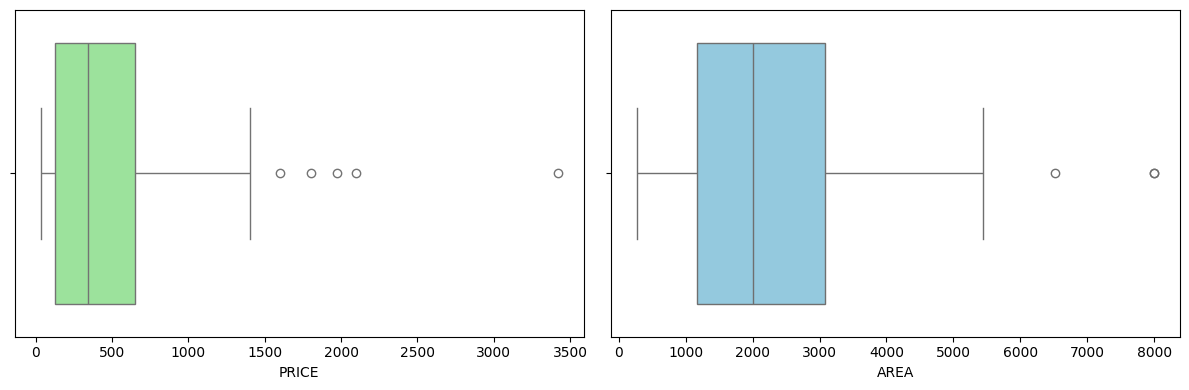

In [103]:
ind_house = ind_house.drop(
    index=ind_house[ind_house["PROP_ID"].isin(rent_ind_house["PROP_ID"])].index,
).reset_index(drop=True)

print(ind_house.shape)
boxplot(ind_house)

In [104]:
# I checked
ind_house.query("PRICE>3000 or AREA>@C.TEN_K")

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
34,https://99acres.com/N70440818,south mumbai,3421.0,52500.0,6516.0,4 bedroom house in worli,"the world towers in worli, mumbai south by lod...",independent house/villa,4.0,lodha world towers


(34, 10)


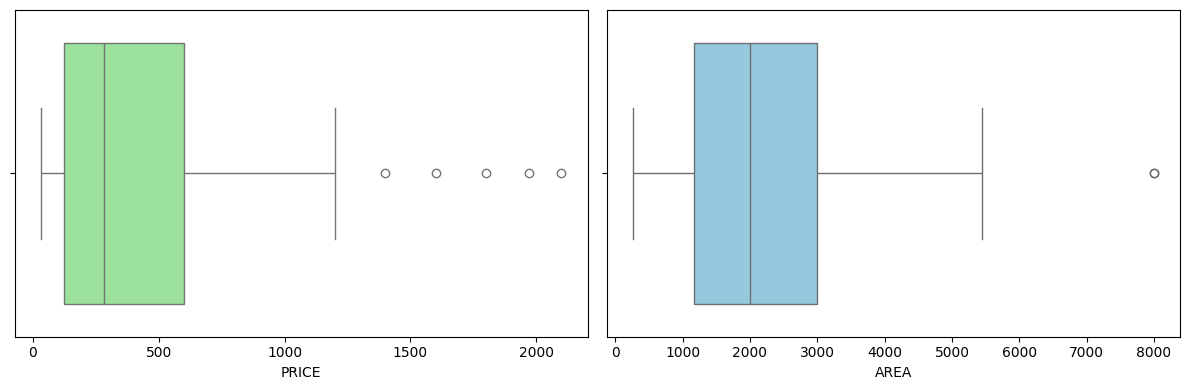

In [105]:
ind_house = ind_house.query("PRICE<3000 and AREA<@C.TEN_K")
print(ind_house.shape)
boxplot(ind_house)

In [106]:
ind_house[imp_cols].describe()

,PRICE,AREA,PRICE_SQFT
count,34.000000,34.000000,3.400000e+01
mean,523.176471,2471.867647,1.479375e+05
std,591.104845,1955.365305,4.389573e+05
min,32.000000,269.000000,2.500000e+03
25%,122.000000,1162.500000,9.063750e+03
50%,282.500000,2000.000000,1.746750e+04
75%,600.000000,3000.000000,5.224300e+04
max,2100.000000,8000.000000,2.500000e+06


### **Summary** - _Rental_ Independent Houses

- Data Length: **430**
- PRICE range: **6L to 25Cr**
- AREA range: **122 to 9.5k sq.ft.**

## Merge rent_apartment and rent_ind_house

(1201, 10)


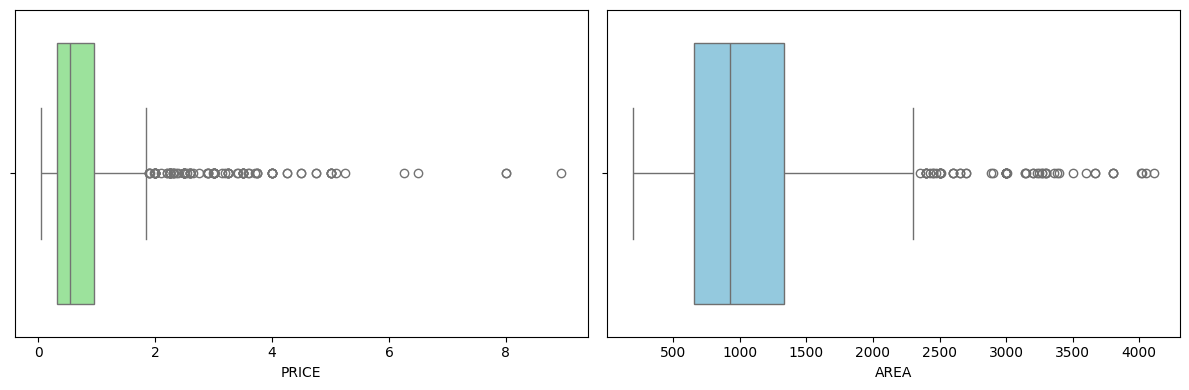

In [107]:
rent_apartment_house = pd.concat([rent_res_apartment, rent_ind_house], ignore_index=True)
print(rent_apartment_house.shape)
boxplot(rent_apartment_house)

In [108]:
rent_apartment_house.query("PRICE>10 or AREA>@C.TEN_K")

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME


(1201, 10)


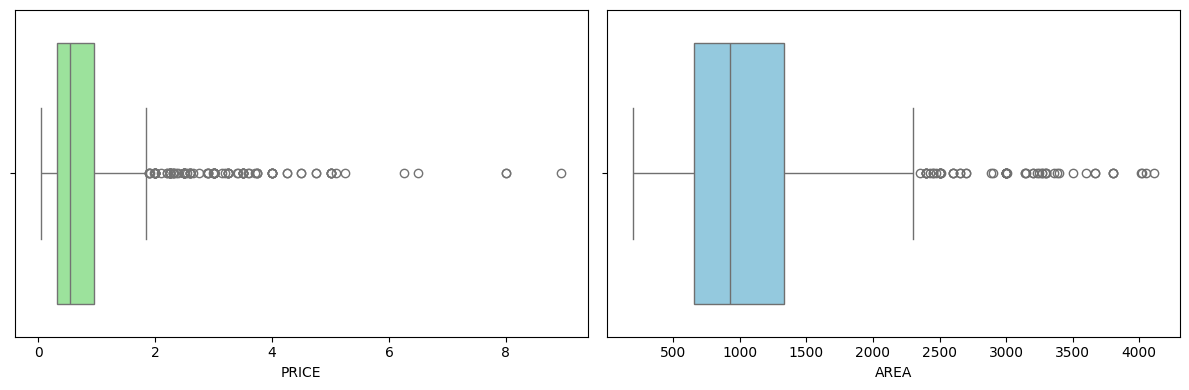

In [109]:
rent_apartment_house = rent_apartment_house.query("PRICE<10 and AREA<@C.TEN_K")
print(rent_apartment_house.shape)
boxplot(rent_apartment_house)

In [110]:
rent_apartment_house[imp_cols].describe()

,PRICE,AREA,PRICE_SQFT
count,1201.000000,1201.000000,1201.000000
mean,0.837648,1093.863447,75.470441
std,0.934074,634.803599,71.736155
min,0.045000,200.000000,7.000000
25%,0.320000,654.000000,41.000000
50%,0.550000,925.000000,64.000000
75%,0.950000,1330.000000,90.000000
max,8.950000,4111.000000,1303.000000


## PostProcessing

In [111]:
print(f"{res_apartment.shape = }")
print()
print(f"{ind_floor.shape = }")
print(f"{rent_ind_floor.shape = }")
print()
print(f"{res_land.shape = }")
print()
print(f"{ind_house.shape = }")
print()
print(f"{rent_apartment_house.shape = }")

res_apartment.shape = (6386, 10)

ind_floor.shape = (6, 10)
rent_ind_floor.shape = (1, 10)

res_land.shape = (53, 10)

ind_house.shape = (34, 10)

rent_apartment_house.shape = (1201, 10)


### Export datasets

In [115]:
from pathlib import Path


dir_path = Path("data/mumbai")
dir_path.mkdir(parents=True, exist_ok=True)

fp_mapping = {
    dir_path / "res_apartment.csv": res_apartment,
    dir_path / "ind_floor.csv": ind_floor,
    dir_path / "rent_ind_floor.csv": rent_ind_floor,
    dir_path / "res_land.csv": res_land,
    dir_path / "ind_house.csv": ind_house,
    dir_path / "rent_apartment_house.csv": rent_apartment_house,
}

In [116]:
common_cols = [
    "AREA",
    "BEDROOM_NUM",
    "CITY",
    "DESCRIPTION",
    "PRICE",
    "PRICE_SQFT",
    "PROPERTY_TYPE",
    "PROP_HEADING",
    "PROP_NAME",
]

In [114]:
for fp, dataset in fp_mapping.items():
    dataset["PROP_ID"] = dataset["PROP_ID"].str.removeprefix("https://99acres.com/").str.lower()
    dataset.drop(columns=common_cols).merge(main_df, how="left", on="PROP_ID").to_csv(
        fp, index=False
    )